# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

A neuron computes a linear function (z = Wx + b) followed by an activation function

####  2. Why we use non-linear activation funcitons in neural networks?

If we use linear functions, than we do not need multi-layer neural networks, we only need one layer.

#### 3. What is the 'Logistic Loss' ?

Is meant to resolve classification problems where given an element you have to classify the same in N categories. Typical examples are for example given a mail to classify it as spam or not, or given a vehicle find to wich category it belongs (car, truck, van, etc ..). That's basically the output is a finite set of descrete values.

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

I recommend C. Because A,B and D are more suitable for inter layers. The output of sigmoid function is between 0 and 1. It represents the probablity that the data belongs to certain class. 

#### 5. Why we don't use zero initialization for all parameters ?

In that way, everyone neuron has the same value and gradients. Both forward and backword propagation looks the same.

#### 6. Can you implement the softmax function using python ? 

Yes, we can.

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()

In [8]:
digits



{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

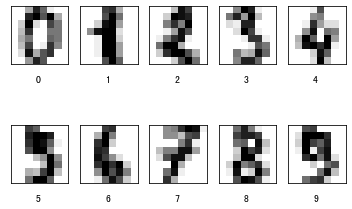

In [3]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [11]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [13]:
!pwd

/media/lucca/D:/nlp/lec4


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [14]:
import numpy as np

def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [15]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [16]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [17]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    X = normalization(X)

    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
#     sum=0.0
#     for x in map(lambda y,p:(1-y)*math.log(1-p)+y*math.log(p),Y,A):
#         sum+=x
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw = np.dot(X,(A-Y).T)/m
    db = 1/m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [18]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w + (-1 * dw) * learning_rate
        b = b + (-1 * db) * learning_rate
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [19]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
#     Y_prediction = []
#     for i in range(A.shape[1]):
#         Y_prediction.append([0 if A[0,i]<0.5 else 1])
    for i in range(A.shape[1]):
        if(A[0,i]<=0.5):
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [20]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w,b = initialize_parameters(X_train.shape[0])
    params, grads, cost = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    Y_prediction_training = predict(params["w"],params["b"], X_train)
    Y_prediction_test = predict(params["w"],params["b"], X_test)
    traing_accuracy = 100 - np.mean(np.abs(Y_prediction_training - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100
    d = {"w":w,
         "b":b,
         "training_accuracy": traing_accuracy,
         "test_accuracy":test_accuracy,
         "cost":cost}
    return d

In [21]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1


d = model(X_train.T, y_train.T, X_test.T, y_test.T, 1500, 0.01,print_cost=True)


Cost after iteration 0: 1.452802
Cost after iteration 100: 1.298416
Cost after iteration 200: 1.228319
Cost after iteration 300: 1.165001
Cost after iteration 400: 1.106163
Cost after iteration 500: 1.051665
Cost after iteration 600: 1.001371
Cost after iteration 700: 0.955104
Cost after iteration 800: 0.912655
Cost after iteration 900: 0.873790
Cost after iteration 1000: 0.838258
Cost after iteration 1100: 0.805800
Cost after iteration 1200: 0.776156
Cost after iteration 1300: 0.749074
Cost after iteration 1400: 0.724313


In [22]:
d["training_accuracy"]

60.28210838901262

In [23]:
d["test_accuracy"]

61.11111111111111

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [28]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: {}".format(i))
    models[str(i)] = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 1500, learning_rate = i, print_cost = False)
    print("training accuracy: {}".format(models[str(i)]["training_accuracy"]))
    print("test accuracy: {}".format(models[str(i)]["test_accuracy"]))
    print("cost: {}".format(models[str(i)]["cost"][-1]))
    print ('\n' + "-------------------------------------------------------" + '\n')
 


learning rate is: 0.01
training accuracy: 65.62731997030438
test accuracy: 65.77777777777777
cost: 0.6835502418614197

-------------------------------------------------------

learning rate is: 0.001
training accuracy: 44.61766889383816
test accuracy: 44.666666666666664
cost: 1.2331710925833332

-------------------------------------------------------

learning rate is: 0.0001
training accuracy: 48.70081662954714
test accuracy: 49.33333333333333
cost: 1.5536714217947771

-------------------------------------------------------



In [27]:
num_iterations = [500, 1500, 3000]
models = {}
for i in num_iterations:
    print ("learning rate is: {}".format(i))
    models[str(i)] = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = i, learning_rate = 0.01, print_cost = False)
    print("training accuracy: {}".format(models[str(i)]["training_accuracy"]))
    print("test accuracy: {}".format(models[str(i)]["test_accuracy"]))
    print("cost: {}".format(models[str(i)]["cost"][-1]))
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: 500
training accuracy: 37.787676317743134
test accuracy: 37.77777777777778
cost: 1.2842360453833843

-------------------------------------------------------

learning rate is: 1500
training accuracy: 64.5879732739421
test accuracy: 62.666666666666664
cost: 0.7072650319525251

-------------------------------------------------------

learning rate is: 3000
training accuracy: 77.87676317743133
test accuracy: 78.88888888888889
cost: 0.492453486329891

-------------------------------------------------------



# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from icecream import ic

# Loading the data
digits = datasets.load_digits()

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)


# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(y_test[1])
y_test_multi =np.zeros((y_test.shape[0],10))
for i in range(y_test.shape[0]):
    y_test_multi[i,y_test[i]]= 1

y_train_multi =np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
    y_train_multi[i,y_train[i]]= 1


# reformulate the label.
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

def softmax(X):  # softmax函数
    ans =np.zeros((X.shape[0],X.shape[1]))
    for i in range(X.shape[1]):
        ans[:,i] = np.exp(X[:,i]) / np.sum(np.exp(X[:,i]))
    return ans

# 觉得这种写法比较费事，不知道助教有没有好的建议啊

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector

    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''

    w = np.random.randn(dim, 10)
    b = 0

    assert (w.shape == (dim, 10))
    assert (isinstance(b, float) or isinstance(b, int))

    return w, b

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

def propagate_1(w, b, X, Y):
    '''
    Implement the cost function and its gradient for the propagation

    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    X = normalization(X)

    m = X.shape[1]
    A = softmax(np.dot(w.T, X) + b)
    summ = np.sum(A[:,1])
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dw = np.dot(X, (A - Y).T) / m
    db = 1 / m * np.sum(A - Y)

    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    cost = np.squeeze(cost)
    assert (cost.shape == ())

    grads = {'dw': dw,
             'db': db}
    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm

    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    '''

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate_1(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        w = w + (-1 * dw) * learning_rate
        b = b + (-1 * db) * learning_rate

        if i % 500 == 0:
            costs.append(cost)
        if print_cost and i % 500 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights
    b -- bias
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 10)

    A = softmax(np.dot(w.T, X) + b)

    #     Y_prediction = []
    #     for i in range(A.shape[1]):
    #         Y_prediction.append([0 if A[0,i]<0.5 else 1])
    # for i in range(A.shape[1]):
    #     if (A[0, i] <= 0.5):
    #         Y_prediction[0, i] = 0
    #     else:
    #         Y_prediction[0, i] = 1
    Y_prediction = A
    assert (Y_prediction.shape == (10, m))

    return Y_prediction

def accuracy(y_hat, y):
    accuracy_num = 0
    for i in range(y_hat.shape[0]):
        if y_hat[i]==y[i]:
            accuracy_num += 1
    accuracy_num /= y_hat.shape[0]
    return  accuracy_num

def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, y_train_target, y_test_target, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w, b = initialize_parameters(X_train.shape[0])
    params, grads, cost = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)

    Y_prediction_training = np.argmax(predict(params["w"], params["b"], X_train),axis=0)
    Y_prediction_test = np.argmax(predict(params["w"], params["b"], X_test),axis=0)
    ic(Y_prediction_test)
    ic(y_test_target)

    training_accuracy = accuracy(Y_prediction_training, y_train_target)
    test_accuracy = accuracy(Y_prediction_test, y_test_target)
    d = {"w": w,
         "b": b,
         "training_accuracy": training_accuracy,
         "test_accuracy": test_accuracy,
         "cost": cost}
    return d

d = model(X_train.T, y_train_multi.T, X_test.T, y_test_multi.T, 6000, 0.006, y_train.T, y_test.T, print_cost=True)



Cost after iteration 0: 6.473211
Cost after iteration 500: 4.188889
Cost after iteration 1000: 3.510824
Cost after iteration 1500: 2.979681
Cost after iteration 2000: 2.556976
Cost after iteration 2500: 2.223167
Cost after iteration 3000: 1.958529
Cost after iteration 3500: 1.746743
Cost after iteration 4000: 1.575379
Cost after iteration 4500: 1.435151
Cost after iteration 5000: 1.319117
Cost after iteration 5500: 1.222053


ic| Y_prediction_test: array([6, 5, 9, 4, 7, 1, 4, 5, 2, 2, 1, 8, 8, 8, 8, 9, 0, 0, 0, 6, 2, 0,
                              2, 3, 6, 9, 5, 8, 5, 6, 9, 8, 7, 4, 6, 3, 6, 5, 3, 4, 6, 3, 0, 6,
                              4, 0, 0, 0, 9, 7, 9, 8, 2, 7, 1, 6, 0, 4, 8, 6, 1, 7, 1, 4, 0, 5,
                              5, 6, 1, 7, 5, 5, 1, 3, 0, 9, 0, 9, 5, 3, 5, 9, 6, 4, 8, 4, 7, 9,
                              0, 7, 2, 0, 3, 8, 8, 2, 7, 9, 6, 7, 1, 5, 4, 3, 1, 4, 8, 3, 0, 6,
                              0, 3, 5, 5, 4, 5, 2, 1, 6, 1, 3, 1, 9, 5, 0, 3, 5, 2, 5, 9, 4, 1,
                              5, 8, 5, 4, 7, 4, 6, 6, 4, 2, 4, 1, 3, 5, 5, 7, 1, 3, 5, 1, 0, 6,
                              6, 6, 7, 0, 3, 0, 8, 6, 1, 7, 3, 9, 9, 8, 8, 3, 2, 3, 2, 4, 6, 4,
                              2, 1, 4, 5, 4, 5, 8, 3, 1, 1, 3, 5, 2, 6, 3, 2, 1, 5, 6, 0, 0, 8,
                              4, 8, 1, 0, 7, 0, 7, 1, 7, 1, 2, 8, 6, 0, 6, 5, 3, 7, 7, 0, 4, 6,
                              0, 6, 8, 9

In [6]:
print(d["training_accuracy"])
print(d["test_accuracy"])

0.7787676317743133
0.7666666666666667
